In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

In [2]:
heatmaps_df = pd.read_csv('privatedata/OC_clean.csv')
tut_time_df = pd.read_csv('privatedata/time_on_task_2017-12-11.csv')
assmt_df = pd.read_csv('privatedata/assessment_growth.csv')

assmt_df['Assessment Type'] = assmt_df['Assessment Type'].str.replace('NWEA - ELA', 'Tutoring: Literacy')
assmt_df['Assessment Type'] = assmt_df['Assessment Type'].str.replace('NWEA - MATH', 'Tutoring: Math')

assmt_df['Key'] = assmt_df['Student__c'] + assmt_df['Assessment Type']

In [11]:
tut_time_df['Key'] = tut_time_df['Student__c'] + tut_time_df['Program_Name__c']

In [13]:
df = assmt_df.merge(tut_time_df, how='left', on='Key')

In [16]:
df = df.loc[~df['Growth_v_Target'].isnull()
            &~df['Amount_of_Time__c'].isnull()]

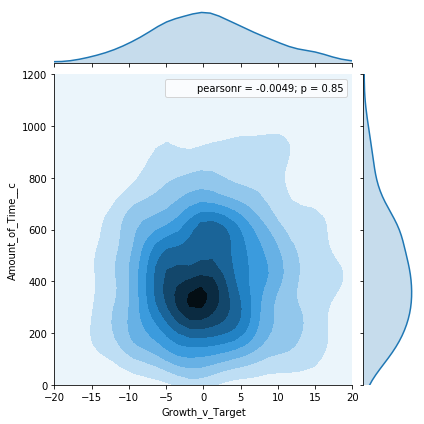

In [17]:
sns.jointplot(x="Growth_v_Target", y="Amount_of_Time__c", data=df, kind="kde", xlim=(-20, 20), ylim=(0, 1200))